In [10]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Verifica la ruta y el delimitador del archivo CSV
df = pd.read_csv('Alquileres.csv', engine='python', delimiter=";")
df = df.replace(',', '.', regex=True)
df['realSum']= df['realSum'].astype(float)
df['dayPrice']= df['dayPrice'].astype(float)
df['dayPriceByPerson']= df['dayPriceByPerson'].astype(float)
df['dist']= df['dist'].astype(float)

# Realiza las operaciones que necesites con el DataFrame
df.head(15)

,ID,realSum,dayPrice,dayPriceByPerson,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekday
0,0,194.033698,388.067396,48.508425,Private room,False,True,2,False,1,...,5.022964,2.539380003,78.69037927,4.166707868,98.25389587,6.846472824,4.90569,52.41772,Amsterdam,True
1,1,344.245776,1376.983104,86.061444,Private room,False,True,4,False,0,...,0.488389,0.239403923,631.1763783,33.42120862,837.2807567,58.34292774,4.90005,52.37432,Amsterdam,True
2,2,264.101422,528.202845,66.025356,Private room,False,True,2,False,0,...,5.748312,3.651621289,75.27587691,3.9859077,95.38695493,6.646700255,4.97512,52.36103,Amsterdam,True
3,3,433.529398,1734.117592,108.382350,Private room,False,True,4,False,0,...,0.384862,0.439876076,493.2725344,26.11910845,875.0330976,60.97356517,4.89417,52.37663,Amsterdam,True
4,4,485.552926,971.105851,121.388231,Private room,False,True,2,True,0,...,0.544738,0.318692647,552.8303244,29.272733,815.30574,56.81167696,4.90051,52.37508,Amsterdam,True
5,5,552.808567,1658.425703,138.202142,Private room,False,True,3,False,0,...,2.131420,1.904668241,174.7889568,9.255191399,225.2016624,15.69237584,4.87699,52.38966,Amsterdam,True
6,6,215.124317,430.248635,53.781079,Private room,False,True,2,False,0,...,1.881092,0.729746739,200.1676516,10.59901016,242.7655237,16.91625096,4.9157,52.38296,Amsterdam,True
7,7,2771.307384,11085.229540,692.826846,Entire home/apt,False,False,4,True,0,...,1.686807,1.458403566,208.8081086,11.05652809,272.3138229,18.97521897,4.88467,52.38749,Amsterdam,True
8,8,1001.804420,4007.217680,250.451105,Entire home/apt,False,False,4,False,0,...,3.719141,1.196112353,106.2264562,5.624761439,133.8762019,9.328686362,4.86459,52.40175,Amsterdam,True
9,9,276.521454,553.042908,69.130363,Private room,False,True,2,False,1,...,3.142361,0.924404439,206.2528615,10.92122606,238.2912578,16.60447768,4.876,52.347,Amsterdam,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   dayPrice                    51707 non-null  float64
 3   dayPriceByPerson            51707 non-null  float64
 4   room_type                   51707 non-null  object 
 5   room_shared                 51707 non-null  bool   
 6   room_private                51707 non-null  bool   
 7   person_capacity             51707 non-null  int64  
 8   host_is_superhost           51707 non-null  bool   
 9   multi                       51707 non-null  int64  
 10  biz                         51707 non-null  int64  
 11  cleanliness_rating          51707 non-null  int64  
 12  guest_satisfaction_overall  51707 non-null  int64  
 13  bedrooms                    517

In [12]:
df.describe()

,ID,realSum,dayPrice,dayPriceByPerson,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000
mean,1620.502388,279.879591,971.364197,69.969898,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285
std,1217.380366,327.948386,1410.207733,81.987097,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803
min,0.000000,34.779339,69.558678,8.694835,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045
25%,646.000000,148.752174,360.779887,37.188043,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142
50%,1334.000000,211.343089,601.143018,52.835772,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538
75%,2382.000000,319.694286,1087.601992,79.923572,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077
max,5378.000000,18545.450280,77623.650600,4636.362570,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557


Utilizamos SeaBorn para analizar cantidades de cada tipo de habitacion y cantidad de superhost en el dataset

In [13]:
df.groupby(['room_type']).size()

room_type
Entire home/apt    32648
Private room       18693
Shared room          366
dtype: int64

In [14]:
df.groupby(['host_is_superhost']).size()

host_is_superhost
False    38475
True     13232
dtype: int64

Observamos la proporcion de cada tipo de habitacion y dentro de cada una la cantidad de superhost

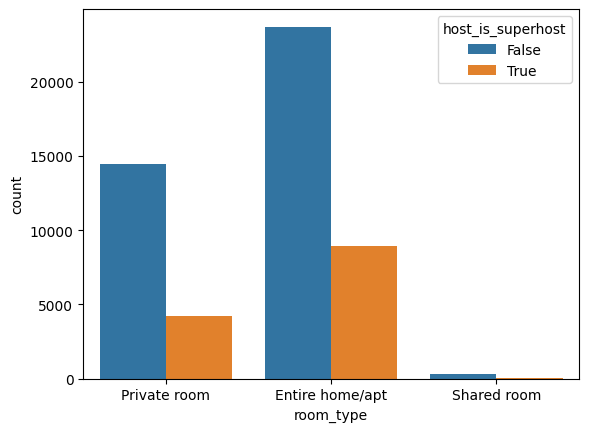

In [15]:
#sns.set(style='darkgrid')
sns.countplot(x='room_type',data=df,hue='host_is_superhost')
plt.show()

Analizamos la distribucion de los precios por persona

<Figure size 1000x1000 with 0 Axes>

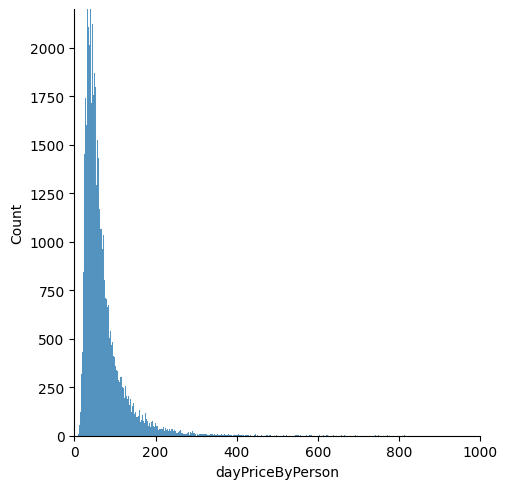

In [16]:
fig = plt.figure(figsize=(10,10))
sns.displot(df['dayPriceByPerson'])
plt.xlim(left=0, right=1000)  # Establecer los límites del eje x
plt.ylim(bottom=0, top=2200)  # Establecer los límites del eje y
plt.show()

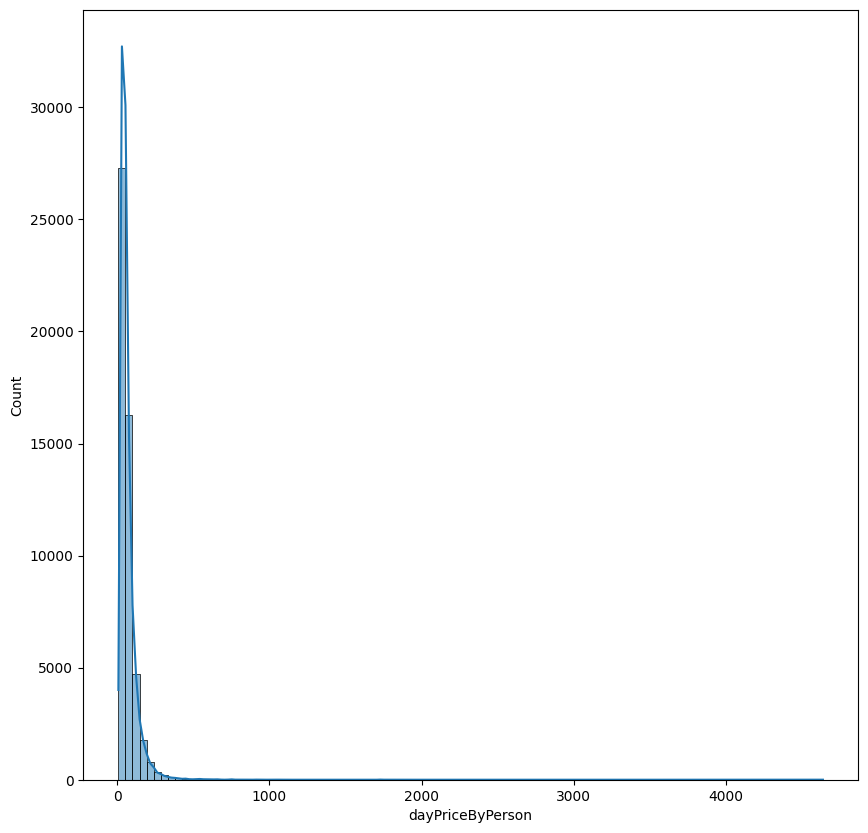

In [17]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df['dayPriceByPerson'], bins=100, kde=True)
plt.show()

Analizando el promedio de precios por dia por persona en cada ciudad

Text(0.5, 1.0, 'Promedio de Precios por Ciudad')

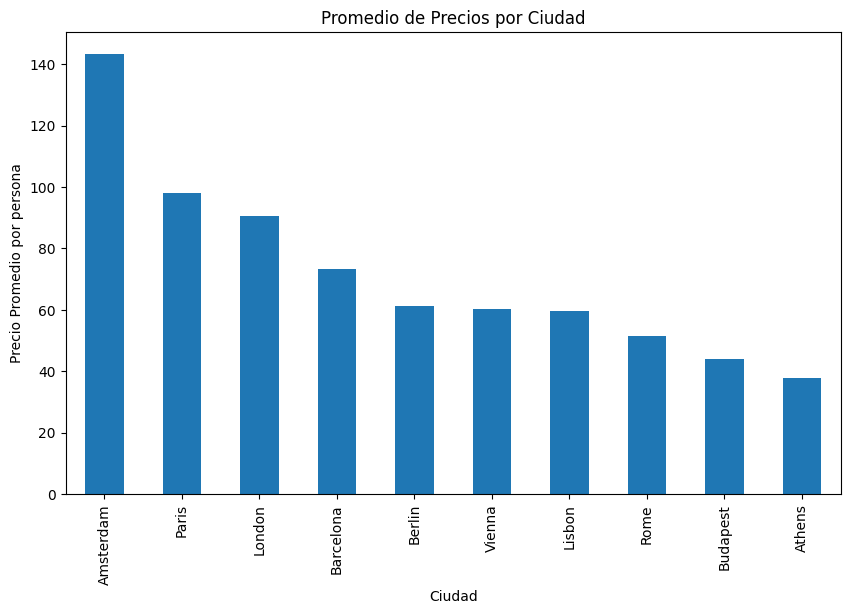

In [18]:
# Calcular el promedio de precios por ciudad
promedios = df.groupby('city')['dayPriceByPerson'].mean().sort_values(ascending=False)

# Crear el gráfico de barras con los promedios de precios
fig, ax = plt.subplots(figsize=(10, 6))
promedios.plot(kind='bar', ax=ax)

# Personalizar el gráfico
ax.set_xlabel('Ciudad')
ax.set_ylabel('Precio Promedio por persona')
ax.set_title('Promedio de Precios por Ciudad')

Analizando la relacion entre las variables de limpieza y valoracion final

Text(0.1, 0.9, 'Coef. Corr.: 0.71')

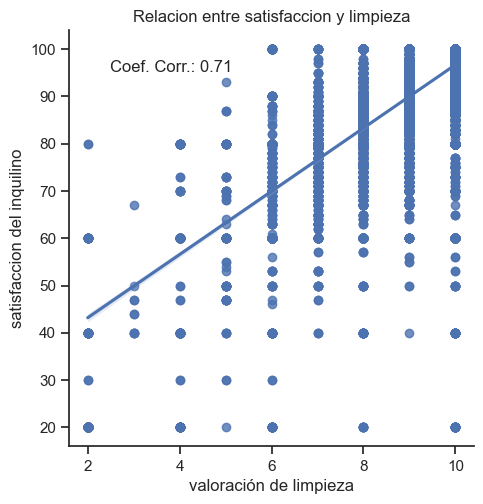

In [19]:
sns.set_theme(style='ticks')
sns.lmplot(
    data = df, x = 'cleanliness_rating', y='guest_satisfaction_overall'
)

coef_corr = df['cleanliness_rating'].corr(df['guest_satisfaction_overall'])

plt.xlabel('valoración de limpieza')
plt.ylabel('satisfaccion del inquilino')
plt.title('Relacion entre satisfaccion y limpieza')

plt.annotate(f'Coef. Corr.: {coef_corr:.2f}', xy=(0.1, 0.9), xycoords='axes fraction')

/var/folders/5q/bdzl6mkd16j_06yhv75wsp3w0000gp/T/ipykernel_11347/2488847738.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['cleanliness_rating'], y=df['guest_satisfaction_overall'], cmap='inferno', shade=True)


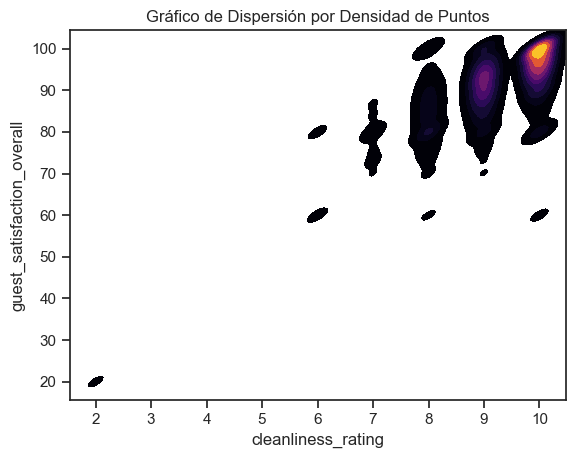

In [20]:
sns.kdeplot(x=df['cleanliness_rating'], y=df['guest_satisfaction_overall'], cmap='inferno', shade=True)

# Personalizar el gráfico
plt.xlabel('cleanliness_rating')
plt.ylabel('guest_satisfaction_overall')
plt.title('Gráfico de Dispersión por Densidad de Puntos')

plt.show()

## Modelo de Predicción
### Dividisión de variable a predecir del resto del dataset

In [21]:
columnas_numericas = df.select_dtypes(include=[float, int]).columns
# Crea el nuevo dataframe con las columnas numéricas
X = df[columnas_numericas].copy()
print(X.columns)

y = df.iloc[:, 1].values #columna realSum
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['ID', 'realSum', 'dayPrice', 'dayPriceByPerson', 'person_capacity',
       'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall',
       'bedrooms', 'dist'],
      dtype='object')


In [7]:
X

,ID,realSum,dayPrice,dayPriceByPerson,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist
0,0,194.033698,388.067396,48.508425,2,1,0,10,93,1,5.022964
1,1,344.245776,1376.983104,86.061444,4,0,0,8,85,1,0.488389
2,2,264.101422,528.202845,66.025356,2,0,1,9,87,1,5.748312
3,3,433.529398,1734.117592,108.382350,4,0,1,9,90,2,0.384862
4,4,485.552926,971.105851,121.388231,2,0,0,10,98,1,0.544738
...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,4295.631442,178.984643,6,0,1,10,100,3,0.530181
51703,1795,304.793960,609.587920,76.198490,2,0,0,8,86,1,0.810205
51704,1796,637.168969,1274.337938,159.292242,2,0,0,10,93,1,0.994051
51705,1797,301.054157,602.108314,75.263539,2,0,0,10,87,1,3.044100


In [8]:
y

array([194.0336981, 344.245776 , 264.1014224, ..., 637.168969 ,
       301.054157 , 133.2304887])

###  Entrenamiento del modelo de Regresión Lineal con el dataset de Training

In [22]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicción de los resultados del dataset de Test

In [38]:
y_pred = regressor.predict(X_test)
y_pred

#Recorrer todas las columnas numéricas para probar la regresión lineal
# for var in columnas_numericas:
#     x = X_train[[var]]
#     print(x)
#     print(y_train)
#     plt.scatter(x, y_train, color = 'red')
#     plt.plot(x, regressor.predict(x), color = 'blue')
#     plt.title('Salary vs Experience (Training set)')
#     plt.xlabel('Years of Experience')
#     plt.ylabel('Salary')
#     plt.show()

       guest_satisfaction_overall
31605                          94
42714                         100
5234                          100
24047                          94
18303                          96
...                           ...
11284                          94
44732                          91
38158                          97
860                           100
15795                         100

[41365 rows x 1 columns]


## Modelo de Predicción 2

In [ ]:
# de km a cuadras:
from_km_to_blocks = 0.1
df["dist_en_cuadras"] = df["dist"] / from_km_to_blocks
df

In [70]:
X_row = df.iloc[:, -1].values
X = X_row.reshape(-1,1)
X

array([[50.22963798],
       [ 4.88389289],
       [57.48311915],
       ...,
       [ 9.94051332],
       [30.4409973 ],
       [12.63931726]])

In [72]:
y = df.iloc[:, 1].values
y

array([194.0336981, 344.245776 , 264.1014224, ..., 637.168969 ,
       301.054157 , 133.2304887])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
X_train

array([[43.16048955],
       [35.02750743],
       [10.78494148],
       ...,
       [34.82529544],
       [24.16837991],
       [21.3938255 ]])

In [75]:
y_train

array([284.578659 , 138.4050686, 243.2451433, ..., 382.3748718,
       274.1780517, 144.052263 ])

In [76]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = regressor.predict(X_test)
y_pred

array([266.01767514, 258.28582309, 290.46622575, ..., 279.58395894,
       287.34388542, 263.85815773])

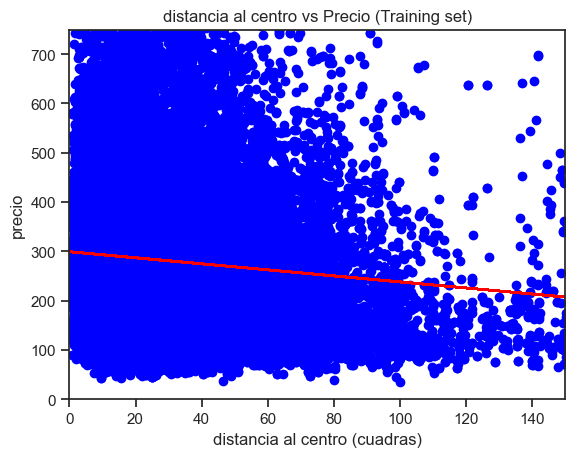

In [91]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('distancia al centro vs Precio (Training set)')
plt.xlabel('distancia al centro (cuadras)')
plt.ylabel('precio')

y_limit = 750
x_limit = 150
plt.ylim(0, y_limit)
plt.xlim(0,x_limit)

plt.show()

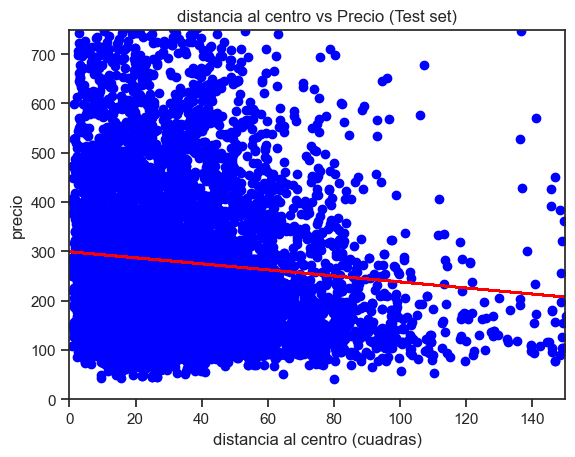

In [90]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('distancia al centro vs Precio (Test set)')
plt.xlabel('distancia al centro (cuadras)')
plt.ylabel('precio')

y_limit = 750
x_limit = 150
plt.ylim(0, y_limit)
plt.xlim(0,x_limit)

plt.show()

In [93]:
r2 = r2_score(y_test, y_pred)
r2
# pesimo coeficiente

0.0018443108276641196